The geodata is provided by © OpenStreetMap contributors and is made available here under the Open Database License (ODbL).



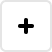
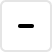
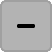
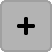
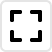
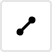
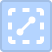

In [1]:
from lets_plot import *
from lets_plot.geo_data import *

from lets_plot.settings_utils import geocoding_service
#LetsPlot.set(geocoding_service(url='http://3.86.228.157:3025'))

import pandas as pd

LetsPlot.setup_html()

In [2]:
income_all = pd.read_csv('https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/US_household_income_2017.csv', encoding='latin-1')
income_all.head(3)

id  State_Code State_Name State_ab          County        City  \
0  1011000           1    Alabama       AL   Mobile County   Chickasaw   
1  1011010           1    Alabama       AL  Barbour County  Louisville   
2  1011020           1    Alabama       AL   Shelby County  Columbiana   

             Place  Type Primary  Zip_Code Area_Code     ALand  AWater  \
0   Chickasaw city  City   place     36611       251  10894952  909156   
1        Clio city  City   place     36048       334  26070325   23254   
2  Columbiana city  City   place     35051       205  44835274  261034   

         Lat        Lon   Mean  Median  Stdev        sum_w  
0  30.771450 -88.079697  38773   30506  33101  1638.260513  
1  31.708516 -85.611039  37725   19528  43789   258.017685  
2  33.191452 -86.615618  54606   31930  57348   926.031000

In [3]:
income_by_state = income_all.groupby("State_Name", as_index=False)["Mean"].mean()
income_by_state.head(3)

State_Name          Mean
0    Alabama  53612.925856
1     Alaska  77670.209524
2    Arizona  62578.071313

In [4]:
income_by_county = income_all.groupby(["State_Name","County"], as_index=False)["Mean"].mean()
income_by_county.head(3)

State_Name          County          Mean
0    Alabama  Autauga County  53735.557235
1    Alabama  Barbour County  37725.000000
2    Alabama   Blount County  55127.000000

In [5]:
us48 = regions_state('us-48').to_data_frame()['found name'].tolist()

NameError: name 'regions_state' is not defined

In [ ]:
data = income_by_county
data = data[data.State_Name.isin(us48)]
row_count, _ = data.shape
print(row_count)

In [ ]:
counties = regions_builder2('county', 
                            names=data["County"].tolist(), 
                            states=data["State_Name"].tolist())\
    .drop_not_matched()\
    .build()

In [ ]:
counties.to_data_frame()

In [ ]:
centroids=counties.centroids()
centroids

In [ ]:
# map_join is lacking multi-key support, so we use pandas.merge
data_with_geometry = centroids.merge(data, left_on=['request', 'state'], right_on=['County', 'State_Name'])
data_with_geometry

In [ ]:
ggplot() + geom_point(aes(color='Mean'), data_with_geometry)

In [ ]:
boundaries=counties.boundaries()
boundaries

In [ ]:
# map_join is lacking multi-key support, so we use pandas.merge
data_with_boundaries = boundaries.merge(data, left_on=['request', 'state'], right_on=['County', 'State_Name'])
data_with_boundaries


In [ ]:
map_theme = theme(axis_line="blank", axis_text="blank", axis_title="blank", axis_ticks="blank") + ggsize(900, 400)
ggplot() + geom_map(aes(fill='Mean'), data_with_boundaries) + scale_fill_gradient(low="#007BCD", high="#FE0968", name="Mean income") + map_theme

Issues

In [ ]:
# drop_not_found breaks parents - these columns are missing
regions_builder2('county', 
                 names=['Wayne County', 'Not existing County', 'Anson County'],
                states=['New York', 'New York', 'North Carolina'],
                countries=['usa', 'usa', 'usa'])\
    .drop_not_found()\
    .build()

In [ ]:
# issue with parents geocoding - unexpected ranking behaviour results in broken responses.
# When mulitply object found by one request ambiguous response is generated without use of ranking by weight. 
# Ambiguous response is also borken - it returns success response with first namesake object ¯\_(ツ)_/¯
regions_builder2('county', 
                 names=['Wayne County', 'Essex County'],
                states=['New York', 'Virginia'],
                countries=['usa', 'usa'])\
    .build()

In [ ]:
# not informative error message
regions_builder2('county', 
                 names=['Wayne County', 'Essex County'],
                states=['New York', 'Virginia'],
                countries=['usa'])\
    .build()

In [ ]:
# regions in parent is not yet supported
state_regions = regions_builder2('state', names=data["State_Name"].tolist(), countries=['uSa'] * row_count).build()
counties_via_regions = regions_builder2('county', 
                            names=data["County"].tolist(), 
                            states=state_regions)\
    .drop_not_matched()\
    .build()
counties_via_regions.to_data_frame()

In [ ]:
regions_builder2('state', names=['florida'], scope='Uruguay').build()

In [ ]:
regions_builder2('state', names=['florida', 'florida'], countries=['usa', 'Uruguay']).build()